In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import display
import itertools
import imghdr

In [3]:
path = Path('images-kategorier');
path.ls()
files = [f for f in path.glob("*/*")]
files = list(itertools.chain(files))

In [4]:
np.random.seed(2)
pat = r'/([^/]+)/[^/]+.jpg$'

In [5]:
data = ImageDataBunch.from_name_re(
    path, files, pat, valid_pct=0.1,
    ds_tfms=get_transforms(), size=224, bs=64)

In [6]:
data.classes

['Arkivalier', 'Fotografier', 'Genstande', 'Maleri', 'Tegninger']

In [40]:
# data.show_batch(rows=5, figsize=(8,8))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [9]:
learn.fit_one_cycle(8)

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_top_losses(9, figsize=(15,11))

In [50]:
imgPath = Path('images-random')
files = list(imgPath.glob("*"))
random.shuffle(files)
len(files)

5000


 images-random/KMM-50060.jpg – Arkivalier :


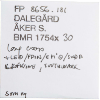


 images-random/DMR-56601.jpg – Arkivalier :


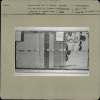


 images-random/FLM-58121.jpg – Genstande :


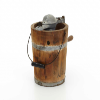


 images-random/KMM-100182.jpg – Genstande :


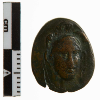


 images-random/FHM-267492.jpg – Fotografier :


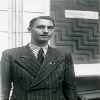


 images-random/DMR-40157.jpg – Maleri :


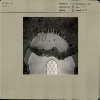


 images-random/DO-5117.jpg – Genstande :


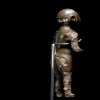


 images-random/FLM-252504.jpg – Maleri :


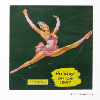


 images-random/ES-209917.jpg – Maleri :


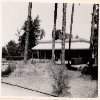


 images-random/DMR-189768.jpg – Maleri :


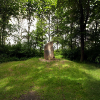


 images-random/ES-140833.jpg – Genstande :


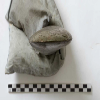


 images-random/FLM-504.jpg – Arkivalier :


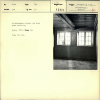


 images-random/FHM-175361.jpg – Arkivalier :


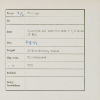


 images-random/FHM-223672.jpg – Fotografier :


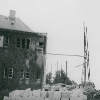


 images-random/KMM-58590.jpg – Genstande :


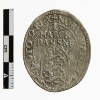


 images-random/AS-6714.jpg – Maleri :


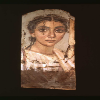


 images-random/FLM-44388.jpg – Genstande :


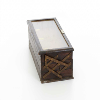


 images-random/FHM-205099.jpg – Arkivalier :


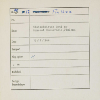


 images-random/FHM-237082.jpg – Fotografier :


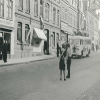


 images-random/FLM-93776.jpg – Genstande :


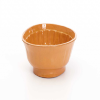

In [42]:
for file in files[:20]:
    try:
        img = open_image(file)
    except:
        continue
    pred_class,pred_idx,outputs = learn.predict(img)
    img.resize(100)
    print("\n", file, '–', pred_class, ':')
    display(img)
    

In [51]:
#!mkdir -p images-kat2/Arkivalier
#!mkdir -p images-kat2/Fotografier
#!mkdir -p images-kat2/Genstande
#!mkdir -p images-kat2/Tegninger
#!mkdir -p images-kat2/Maleri
#for file in files:
#    try:
#        img = open_image(file)
#    except:
#        continue
#    pred_class,pred_idx,outputs = learn.predict(img)
#    path = 'images-kat2/' + str(pred_class)
#    !cp $file $path